<br>

####   hw5pr1iris_modeler 
+ iris clasification via decision trees and random forests...
+ [here is the assignment page](https://docs.google.com/document/d/1oLNNM8jfWdG3xXvmRojXLgDWE-mFNgQUsohZ4dmfPV0/edit)
+ [here is the hw5 page, specifically](https://docs.google.com/document/d/1l82PGTqIQkFJAGRCv0hxa2ifccM0YFzIYRzsBib2dAM/edit)



In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [2]:
# let's read in our flower data...
# 
# iris_cleaned.csv and hw4pr1iris_cleaner.ipynb should be in this folder
# 
filename = 'iris_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

iris_cleaned.csv : file read into a pandas dataframe.


In [3]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# let's print the whole dataframe, too  (adapt # of lines, as desired)
# pd.options.display.max_rows = 150   # None for no limit; default: 10
# pd.options.display.min_rows = 150   # None for no limit; default: 10
# pd.options.display.max_rows = 10   # None for no limit; default: 10
# pd.options.display.min_rows = 10   # None for no limit; default: 10
df_tidy

df_tidy.shape is (141, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  141 non-null    float64
 1   sepalwid  141 non-null    float64
 2   petallen  141 non-null    float64
 3   petalwid  141 non-null    float64
 4   irisname  141 non-null    object 
 5   irisnum   141 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.7+ KB


,sepallen,sepalwid,petallen,petalwid,irisname,irisnum
0,4.6,3.6,1.0,0.2,setosa,0
1,4.3,3.0,1.1,0.1,setosa,0
2,5.0,3.2,1.2,0.2,setosa,0
3,5.8,4.0,1.2,0.2,setosa,0
4,4.4,3.0,1.3,0.2,setosa,0
...,...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica,2
137,7.6,3.0,6.6,2.1,virginica,2
138,7.7,3.8,6.7,2.2,virginica,2
139,7.7,2.8,6.7,2.0,virginica,2


In [4]:
#
# All of the columns need to be numeric, we'll drop irisname
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'irisname', axis=COLUMN )
df_model1

,sepallen,sepalwid,petallen,petalwid,irisnum
0,4.6,3.6,1.0,0.2,0
1,4.3,3.0,1.1,0.1,0
2,5.0,3.2,1.2,0.2,0
3,5.8,4.0,1.2,0.2,0
4,4.4,3.0,1.3,0.2,0
...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,2
137,7.6,3.0,6.6,2.1,2
138,7.7,3.8,6.7,2.2,2
139,7.7,2.8,6.7,2.0,2


In [5]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisnum'], dtype='object')

COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisnum': 4}


setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
#
# We _could_ reweight our columns...
# For exmaple, if petalwid were "worth" 20x more than the others?
# 

# df_model1['petalwid'] *= 20
# df_model1

#
# But, with decision trees (and random forests), we don't need to adjust "exchange-rates" among features
#
#      Instead, we let the various if/else branches separate the data into "comparable" subsets...
#

In [6]:
#
# let's convert our dataframe to a numpy array, named A
#
A = df_model1.to_numpy()   
print(A)

[[4.6 3.6 1.  0.2 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [4.6 3.2 1.4 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.8 3.  1.4 0.3 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.  3.3 1.4 0.2 0. ]
 [5.1 3.5 1.4 0.2 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.3 3.7 1.5 0.2 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [5.4 3.4 1

In [7]:
#
# let's make sure it's all floating-point (here, it already is, but in other datasets it might not be)
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[4.6 3.6 1.  0.2 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [4.6 3.2 1.4 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.8 3.  1.4 0.3 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.  3.3 1.4 0.2 0. ]
 [5.1 3.5 1.4 0.2 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.3 3.7 1.5 0.2 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [5.4 3.4 1

In [8]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 141 rows and 5 cols


In [9]:
# let's use all of our variables, to reinforce that we have
# (1) names...
# (2) access and control...

# choose a row index, n:
n = 42
print(f"flower #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['irisnum']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

flower #42 is [5.4 3.9 1.7 0.4 0. ]
  Its sepallen is 5.4
  Its sepalwid is 3.9
  Its petallen is 1.7
  Its petalwid is 0.4
  Its irisnum is 0.0
  Its species is setosa (i.e., 0)


In [10]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:4]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,4]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
X_all (just the features, first few rows) are 
 [[4.6 3.6 1.  0.2]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 0.2]
 [5.8 4.  1.2 0.2]
 [4.4 3.  1.3 0.2]]


In [11]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 1. 2. 1. 2. 2. 2. 2. 0. 0. 1. 0. 2. 2. 0. 1. 0. 0. 2. 2. 2. 0. 0. 2.
 1. 0. 2. 0. 0. 2. 2. 1. 0. 2. 1. 0. 2. 2. 2. 0. 1. 2. 0. 0. 0. 0. 2. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 0. 0. 2. 2. 2. 1. 1. 0. 0. 0. 2. 1. 2.
 2. 0. 0. 1. 2. 0. 2. 0. 0. 2. 2. 0. 0. 1. 1. 2. 0. 1. 2. 0. 1. 1. 1. 1.
 2. 0. 2. 1. 2. 1. 0. 1. 0. 1. 1. 2. 1. 0. 1. 2. 1. 1. 0. 1. 2. 1. 1. 2.
 0. 1. 1. 2. 2. 0. 0. 1. 2. 2. 1. 1. 1. 1. 1. 2. 0. 2. 1. 1. 2.]
The corresponding data rows are 
 [[6.3 2.3 4.4 1.3]
 [6.7 3.  5.  1.7]
 [6.3 2.9 5.6 1.8]
 [5.6 3.  4.1 1.3]
 [6.4 2.7 5.3 1.9]]


In [14]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 112 rows;  testing with 29 rows

Held-out data... (testing data: 29)
y_test: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

X_test (few rows): [[6.4 2.9 4.3 1.3]
 [6.5 3.  5.2 2. ]
 [5.2 3.5 1.5 0.2]
 [5.7 2.6 3.5 1. ]
 [6.2 2.8 4.8 1.8]]

Data used for modeling... (training data: 112)
y_train: [2. 0. 0. 0. 0. 1. 1. 2. 1. 2. 1. 0. 1. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 0.
 0. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 2.
 0. 0. 1. 1. 2. 2. 0. 0. 2. 0. 0. 0. 1. 2. 0. 2. 2. 2. 1. 1. 2. 0. 2. 1.
 2. 1. 2. 1. 0. 1. 1. 1. 1. 2. 2. 1. 1. 0. 2. 1. 1. 2. 0. 0. 2. 2. 0. 1.
 0. 0. 0. 2. 2. 2. 1. 1. 2. 2. 0. 1. 2. 0. 1. 2.]

X_train (few rows): [[6.9 3.1 5.4 2.1]
 [4.9 3.  1.4 0.2]
 [5.  3.3 1.4 0.2]
 [5.5 3.5 1.3 0.2]
 [4.8 3.4 1.6 0.2]]


<br>

#### Here is where the model-buidling begins in earnest...

In [19]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


<br>

#### That's it! :-)

In [60]:
#
# Let's print these more helpfully, in a vertical table
#



def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa setosa         
row  19 :    virginica virginica      
row  20 :   versicolor versicolor     
row  21 :   versicolor virginica      incorrect
row  22 :    virginica virginica      
row  23 :    virginica virginica      
row  24 :   versicolor versicolor    

25

<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

In [49]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
    
#
# Lab task:  build trees at depths 1 and 2+ (submit in this notebook -- see next cell for depth-1 solution)
#

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]\nclass = versicolor", fillcolor="#fafefc"] ;
1 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.497\nsamples = 74\nvalue = [0, 40, 34]\nclass = versicolor", fillcolor="#e1fbec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

In [ ]:
#
# include your screenshot locally, to this notebook...
#

from IPython import display
display.Image("./tree_screenshot1.png")  # be sure it has the right name, and is in this directory...

# if you've displayed this cell's output, you don't need to submit the image file:
# the notebook keeps an internal version of the image, which is all that's needed.

In [ ]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# Above, we used a depth of 1    (only 1 split) 
# There's NO WAY to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#   + deeper always has the potential to be more accurate
#   + but at the risk of _overfitting_ the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#   + A heuristic: "Choose the _smallest_ depth at which the accuracy has plateaued"
#   + that is, is close to maximum...
#

In [51]:
#
# Now, let's see the tree!
#


best_depth = 2   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)        


filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)
    
#
# Lab task:  build trees at depths 1 and 2+ (submit in this notebook -- see next cell for depth-1 solution)
#

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]\nclass = versicolor", fillcolor="#fafefc"] ;
1 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petallen <= 4.85\ngini = 0.497\nsamples = 74\nvalue = [0, 40, 34]\nclass = versicolor", fillcolor="#e1fbec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor", fillcolor="#39e581"] ;
2 -> 3 ;
4 [label="gini = 0.188\nsamples = 38\nvalue = [0, 4, 34]\nclass = virginica", fillcolor="#9050e8"] ;
2 -> 4 ;
{rank=same ; 0} ;
{rank=same ; 2} ;
{rank=same ; 1; 3; 4} ;
}


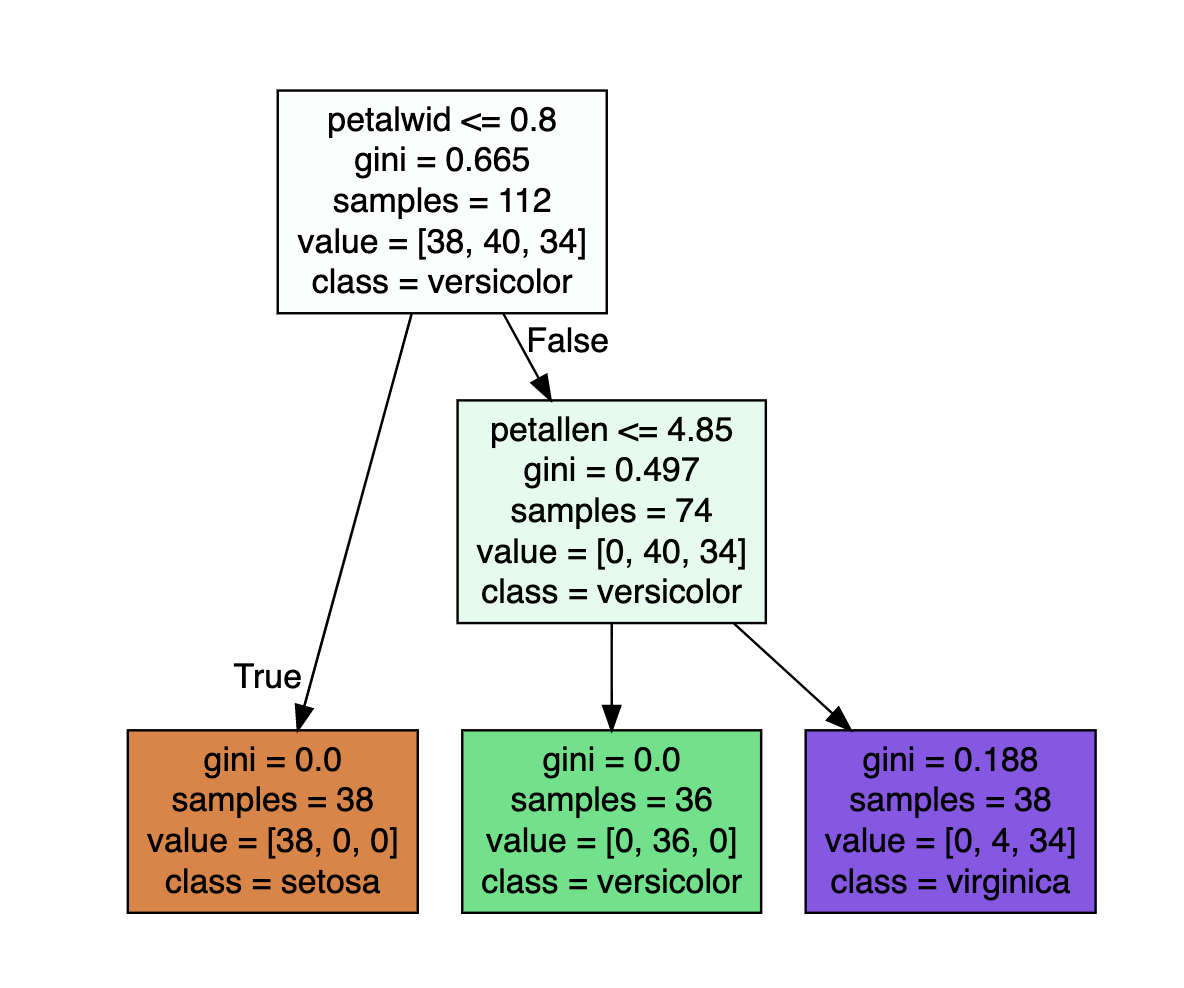

In [53]:
from IPython import display
display.Image("./tree_screenshot2.png") 

In [20]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} is our choice for an underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.6964
depth:  2  cv accuracy:  0.9458
depth:  3  cv accuracy:  0.9640
depth:  4  cv accuracy:  0.9462
depth:  5  cv accuracy:  0.9553

best_depth = 3 is our choice for an underfitting/overfitting balance.


In [21]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 3


<br>

#### <b>Lab task</b>:  showing the depth 2+ tree

In [ ]:
#
# Now, let's see the tree!
#

#
# your task: copy, alter, and re-run the above cells so that you create and 
#            include an image of this deeper tree here in this file
#

In [22]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 1. 2. 2.
 1. 0. 1. 0. 1.]
Actual labels: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa setosa         
row  19 :    virginica virg

25

In [23]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 3


In [26]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [4.6,3.1,2.0,1.5]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict versicolor (1) from Features [4.6, 3.1, 2.0, 1.5]


In [27]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = [[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ]]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' correctly-coded species: 012001122
# almost always the final one is "wrong"  (It's a virginica that "acts like" a versicolor.)

I predict setosa (0) from Features [4.8, 3.1, 1.6, 0.2]
I predict versicolor (1) from Features [5.7, 2.9, 4.2, 1.3]
I predict virginica (2) from Features [5.8, 2.7, 5.1, 1.9]
I predict setosa (0) from Features [5.2, 4.1, 1.5, 0.1]
I predict setosa (0) from Features [5.4, 3.4, 1.5, 0.4]
I predict versicolor (1) from Features [5.1, 2.5, 3.0, 1.1]
I predict versicolor (1) from Features [6.2, 2.9, 4.3, 1.3]
I predict virginica (2) from Features [6.3, 3.3, 6.0, 2.5]
I predict versicolor (1) from Features [5.7, 2.8, 4.1, 1.3]


In [46]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.       0.       0.056798 0.943202]

Feature     sepallen has    0.00% of the decision-making importance.
Feature     sepalwid has    0.00% of the decision-making importance.
Feature     petallen has    5.68% of the decision-making importance.
Feature     petalwid has   94.32% of the decision-making importance.


In [ ]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [ ]:
#
# Random Forests!!!
#

# Lots of trees, each using a subset of the data usually at a limited depth
#                These many trees then get together to "vote" on the correct classification...

#
# This is an example of an "ensemble" classifier, because a RF is simply an ensemble of many DTs.
# 

In [47]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [54]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  27 correct out of 29 total.
row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :    virginica virginica      
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa

27

In [55]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here. 
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=283410592)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.75\ngini = 0.653\nsamples = 44\nvalue = [24, 16, 16]\nclass = setosa", fillcolor="#fae6d7"] ;
1 [label="gini = 0.0\nsamples = 18\nvalue = [24, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.5\nsamples = 26\nvalue = [0, 16, 16]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


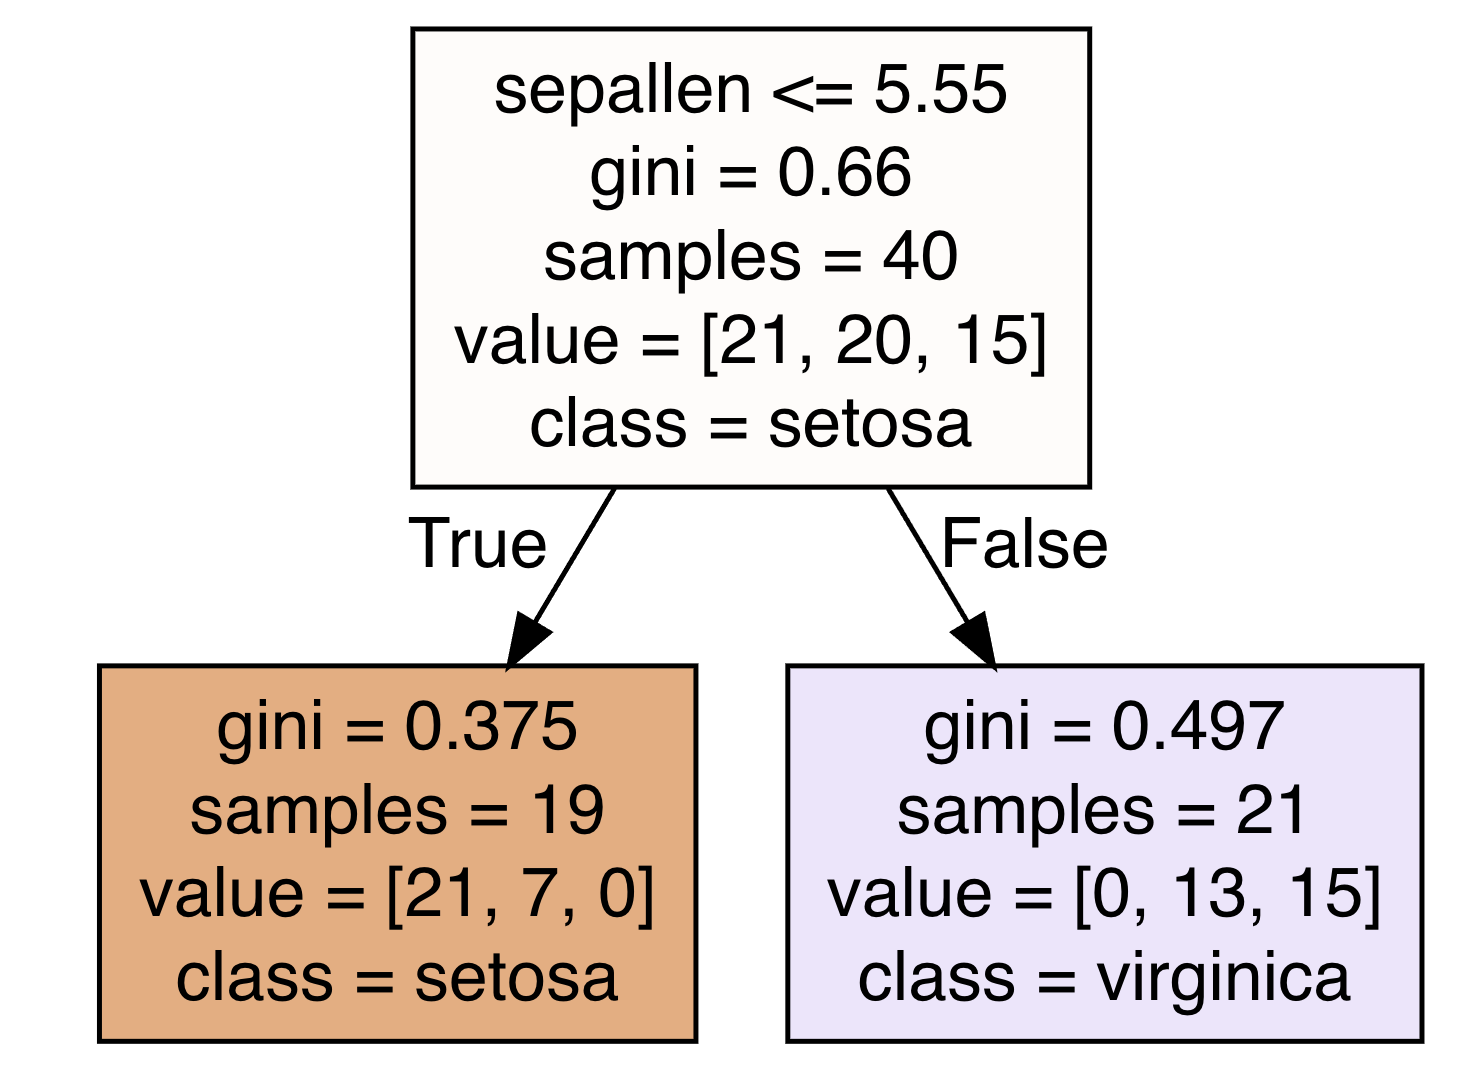

In [56]:
#
# add locally, to this notebook...
#

from IPython import display
display.Image("./random_forest_ss.png")  # be sure it's in the right place!

In [33]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We previously used a depth of 1  and #trees of 42  
#
# So, we try several depths to find best_d
#            and several #'s of trees to find best_ntrees
#
# The tradeoff is underfitting/overfitting and time...
#     "too many trees" tends may add noticeably to execution time

In [61]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1
best_ntrees = 50   # range(50,300,100)
best_score = 0

for d in range(1,6):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_score:
        best_d = d 
        bedt_ntrees = ntrees
# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.8320
depth:  1 ntrees: 150 cv accuracy:  0.9285
depth:  1 ntrees: 250 cv accuracy:  0.9194
depth:  2 ntrees:  50 cv accuracy:  0.9455
depth:  2 ntrees: 150 cv accuracy:  0.9545
depth:  2 ntrees: 250 cv accuracy:  0.9455
depth:  3 ntrees:  50 cv accuracy:  0.9455
depth:  3 ntrees: 150 cv accuracy:  0.9462
depth:  3 ntrees: 250 cv accuracy:  0.9545
depth:  4 ntrees:  50 cv accuracy:  0.9545
depth:  4 ntrees: 150 cv accuracy:  0.9372
depth:  4 ntrees: 250 cv accuracy:  0.9545
depth:  5 ntrees:  50 cv accuracy:  0.9545
depth:  5 ntrees: 150 cv accuracy:  0.9545
depth:  5 ntrees: 250 cv accuracy:  0.9458

best_depth: 5 and best_num_trees: 50 are our choices.


In [62]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = 5
best_num_trees = 50
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [63]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  27 correct out of 29 total.
row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :    virginica virginica      
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa

27

In [64]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [65]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,2.1]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict virginica (2) from Features [6.7, 3.3, 5.7, 2.1]


In [66]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = [[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ]]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict setosa (0) from Features [4.8, 3.1, 1.6, 0.2]
I predict versicolor (1) from Features [5.7, 2.9, 4.2, 1.3]
I predict virginica (2) from Features [5.8, 2.7, 5.1, 1.9]
I predict setosa (0) from Features [5.2, 4.1, 1.5, 0.1]
I predict setosa (0) from Features [5.4, 3.4, 1.5, 0.4]
I predict versicolor (1) from Features [5.1, 2.5, 3.0, 1.1]
I predict versicolor (1) from Features [6.2, 2.9, 4.3, 1.3]
I predict virginica (2) from Features [6.3, 3.3, 6.0, 2.5]
I predict versicolor (1) from Features [5.7, 2.8, 4.1, 1.3]


In [67]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.13008629 0.02212041 0.44882857 0.39896473]

Feature     sepallen has   13.01% of the decision-making importance.
Feature     sepalwid has    2.21% of the decision-making importance.
Feature     petallen has   44.88% of the decision-making importance.
Feature     petalwid has   39.90% of the decision-making importance.


In [ ]:
My DT had an accuracy of: 
My RF had an accuracy of: 
My KNN had an accuracy of:


In [ ]:
#
# That's the random-forest model. Let's consider it found, not lost, for all of its many trees!
#